# Exploration

In [3]:
import pandas as pd
import numpy as np

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("./Data/DonnéesNettoyées.csv")
data.shape

(225262, 21)

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data['Groupe NOVA'] = data['Groupe NOVA'].astype(str).values.tolist()

In [8]:
data.dtypes

Code                    object
Nom du produit          object
Groupe NOVA             object
Nutrition Score          int64
Additifs               float64
Nutri-Score             object
Energie                float64
Lipides                float64
Graisses saturées      float64
Acides gras            float64
Glucides               float64
Sucres                 float64
Fibres                 float64
Protéïnes              float64
Sel                    float64
Sodium                 float64
Alcool                 float64
Fruits-Légumes-Noix    float64
Ingrédients             object
URL                     object
dtype: object

In [9]:
data.head()

Code                            Nom du produit Groupe NOVA  \
0  11110024800           Sea salt roasted deluxe nut mix           3   
1  11110024893               Chunky blue cheese dressing           4   
2  11110025029    100% Unfiltered Juice From Concentrate           1   
3  11110025203  Kroger, english muffins, cinnamon raisin           4   
4  11110025241   Bakery fresh goodness, multigrain bread           4   

   Nutrition Score  Additifs Nutri-Score  Energie  Lipides  Graisses saturées  \
0               13       0.0           d   2540.0    57.14               7.14   
1               26       7.0           e   2163.0    55.17              10.34   
2                5       0.0           c    192.0     0.00               0.00   
3                3       2.0           c   1096.0     0.82               0.00   
4               10       2.0           c   1172.0     4.00               0.00   

   Acides gras   Glucides     Sucres  Fibres  Protéïnes       Sel    Sodium  \
0          0.0  21.430000   3.570000    7.14      17.86  1.088600  0.435440   
1          0.0   3.450000   3.450000    0.00       3.45  2.327500  0.931000   
2          0.0  11.666667  11.666667    0.00       0.00  0.036458  0.014583   
3          0.0  55.740000  16.390000    3.30       6.56  0.942500  0.377000   
4          0.0  52.000000   8.000000    4.00      12.00  2.400000  0.960000   

   Alcool  Fruits-Légumes-Noix  \
0     0.0                  0.0   
1     0.0                  0.0   
2     0.0                  0.0   
3     0.0                  0.0   
4     0.0                  0.0   

                                         Ingrédients  \
0  Cashews, almonds, pecans, brazil nuts, vegetab...   
1  Soybean oil, water, blue cheese (milk, cheese ...   
2                    Water, apple juice concentrate.   
3  Enriched flour (wheat flour, malted barley flo...   
4  Water, enriched flour (wheat flour, malted bar...   

                                                 URL  
0  http://world-en.openfoodfacts.org/product/0011...  
1  http://world-en.openfoodfacts.org/product/0011...  
2  http://world-en.openfoodfacts.org/product/0011...  
3  http://world-en.openfoodfacts.org/product/0011...  
4  http://world-en.openfoodfacts.org/product/0011...

In [10]:
data.describe()

Nutrition Score       Additifs        Energie        Lipides  \
count    225262.000000  225262.000000  225262.000000  225262.000000   
mean          8.686445       2.088355    1104.618632      12.590000   
std           8.678662       2.995015     791.754106      17.172475   
min         -15.000000       0.000000       0.000000       0.000000   
25%           1.000000       0.000000     364.000000       0.100000   
50%           9.000000       1.000000    1070.000000       5.000000   
75%          15.000000       3.000000    1657.000000      20.000000   
max          38.000000      32.000000    3768.120000     100.000000   

       Graisses saturées    Acides gras       Glucides         Sucres  \
count      225262.000000  225262.000000  225262.000000  225262.000000   
mean            4.487718       0.043133      31.202548      14.722362   
std             7.403496       0.422135      28.771703      20.433544   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       5.490000       0.900000   
50%             1.110000       0.000000      20.000000       4.761905   
75%             6.340000       0.000000      57.140000      21.428571   
max           100.000000      35.710000     100.000000     100.000000   

              Fibres      Protéïnes            Sel         Sodium  \
count  225262.000000  225262.000000  225262.000000  225262.000000   
mean        2.152407       7.022210       1.517335       0.602921   
std         4.097068       8.001416       6.101547       2.437065   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.740000       0.060000       0.024000   
50%         0.400000       4.710000       0.543560       0.217000   
75%         3.000000      10.000000       1.320000       0.528000   
max       100.000000     100.000000     100.000000      49.987200   

              Alcool  Fruits-Légumes-Noix  
count  225262.000000        225262.000000  
mean        0.010505             0.703879  
std         0.519225             7.260478  
min         0.000000             0.000000  
25%         0.000000             0.000000  
50%         0.000000             0.000000  
75%         0.000000             0.000000  
max       100.000000           100.000000

#### Seaborn Palette

In [11]:
colors= ['#00823F', '#86BC2B', '#FECC00', '#EF8200', '#E73C09']
colors2= ['#86BC2B', '#FECC00', '#EF8200', '#E73C09']
customPalette = sns.set_palette(sns.color_palette(colors))
customPalette2 = sns.set_palette(sns.color_palette(colors2))

## Analyse univarié

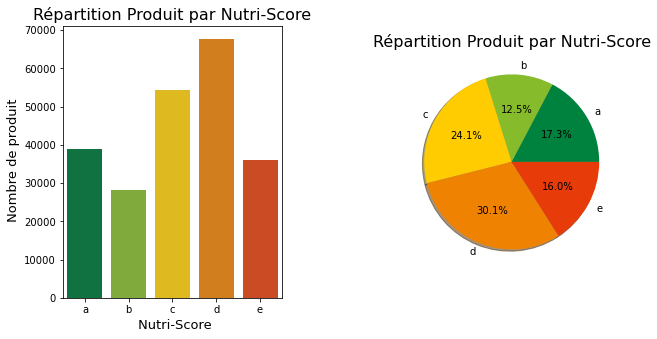

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data['Nutri-Score'], order= ['a','b','c','d','e'], palette=colors)
plt.xlabel(" Nutri-Score", fontsize=13)
plt.ylabel(" Nombre de produit", fontsize=13)
plt.title('Répartition Produit par Nutri-Score', fontsize=16)
plt.subplot(1,2,2)
grade = data['Nutri-Score'].value_counts()
grade= grade.sort_index()
plt.pie(grade, labels= grade.index, autopct='%1.1f%%', shadow=True,  colors=colors)
plt.title('Répartition Produit par Nutri-Score',fontsize=16)
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Répartition Produit par Nutri-Score", bbox_inches='tight')
plt.show()

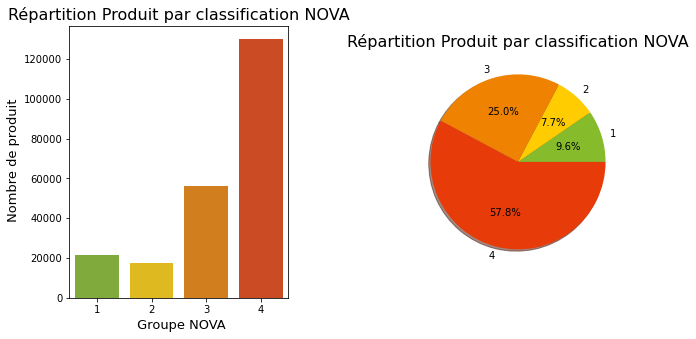

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data['Groupe NOVA'], order= ['1','2','3','4'], palette=customPalette2)
plt.xlabel(" Groupe NOVA", fontsize=13)
plt.ylabel(" Nombre de produit", fontsize=13)
plt.title('Répartition Produit par classification NOVA', fontsize=16)
plt.subplot(1,2,2)
grade = data['Groupe NOVA'].value_counts()
grade= grade.sort_index()
plt.pie(grade, labels= grade.index, autopct='%1.1f%%', shadow=True, colors=colors2)
plt.title('Répartition Produit par classification NOVA',fontsize=16)
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Répartition Produit par classification NOVA", bbox_inches='tight')
plt.show()

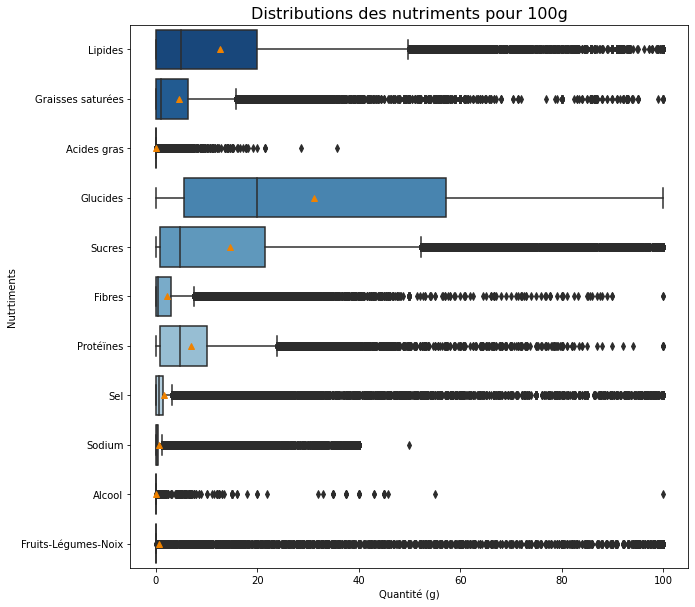

In [14]:
df_100g = data[['Lipides',
               'Graisses saturées',
               'Acides gras',
               'Glucides',
               'Sucres',
               'Fibres',
               'Protéïnes',
               'Sel',
               'Sodium',
               'Alcool',
               'Fruits-Légumes-Noix']]

plt.figure(figsize = (10, 10))
sns.boxplot(data = df_100g, orient='h', showmeans=True, palette='Blues_r')
plt.ylabel("Nutrtiments")
plt.xlabel('Quantité (g)')
plt.title('Distributions des nutriments pour 100g' ,fontsize=16)
plt.savefig("./Visualisations/Distributions des nutriments pour 100g", bbox_inches='tight')
plt.show()

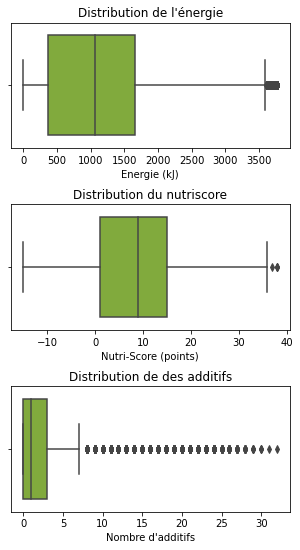

In [15]:
plt.figure(figsize=(5,9))
plt.subplot(3,1,1)
sns.boxplot(data= data, x ='Energie')
plt.xlabel('Energie (kJ)')
plt.title("Distribution de l'énergie")

plt.subplot(3,1,2)
sns.boxplot(data= data, x ='Nutrition Score')
plt.xlabel("Nutri-Score (points)")
plt.title("Distribution du nutriscore")

plt.subplot(3,1,3)
sns.boxplot(data= data, x ='Additifs')
plt.xlabel("Nombre d'additifs")
plt.title('Distribution de des additifs')
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Distributions", bbox_inches='tight')
plt.show()

## Analyse Bivariée

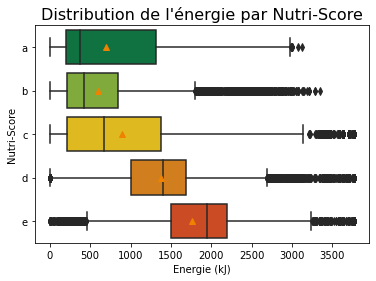

In [16]:
my_pal = {"a": '#00823F', "b": '#86BC2B', "c":'#FECC00', "d":'#EF8200', "e":'#E73C09'}
sns.boxplot(data = data, x = 'Energie', y= "Nutri-Score", showmeans=True, order=['a','b','c','d','e'],  palette=my_pal)
plt.xlabel('Energie (kJ)')
plt.title("Distribution de l'énergie par Nutri-Score",fontsize = 16)
plt.savefig("./Visualisations/Distribution de l'énergie par Nutri-Score", bbox_inches='tight')
plt.show()

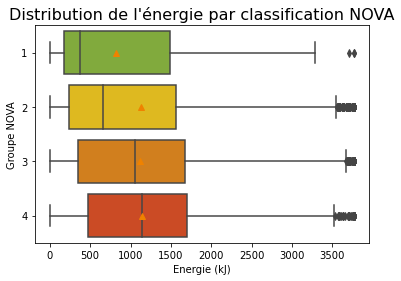

In [17]:
my_pal2 = {"1":'#86BC2B', "2":'#FECC00', "3":'#EF8200', "4":'#E73C09'}
sns.boxplot(data = data, x = 'Energie', y="Groupe NOVA", showmeans=True, order= ['1','2','3','4'],palette=my_pal2)
plt.xlabel('Energie (kJ)')
plt.title("Distribution de l'énergie par classification NOVA" ,fontsize = 16)
plt.savefig("./Visualisations/Distribution de l'énergie par classification NOVA", bbox_inches='tight')
plt.show()

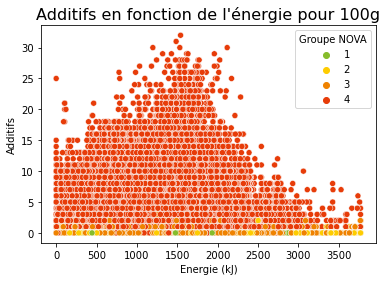

In [18]:
sns.scatterplot(data= data, x=data['Energie'], y=data['Additifs'], hue= data['Groupe NOVA'], palette=customPalette2, 
                hue_order=['1','2','3','4'])
plt.legend(bbox_to_anchor=(1, 1), title= 'Groupe NOVA')
plt.xlabel('Energie (kJ)')
plt.title("Additifs en fonction de l'énergie pour 100g", fontsize = 16)
plt.savefig("./Visualisations/Additifs en fonction de l'énergie pour 100g", bbox_inches='tight')
plt.show()

In [19]:
data_e = data[['Nutri-Score',
               'Energie',
              'Lipides',
              'Glucides',
              'Protéïnes'
              ]]
data_s = data[['Nutri-Score',
               'Nutrition Score',
              'Energie',
              'Graisses saturées',
              'Sucres',
              'Fibres',
              'Protéïnes',
              'Sodium',
              'Fruits-Légumes-Noix',
               'Additifs'
              ]]

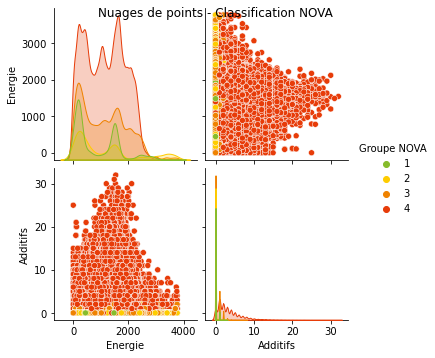

In [20]:
g = sns.pairplot(data[['Groupe NOVA','Energie','Additifs']] ,hue='Groupe NOVA', palette=colors2, hue_order=['1','2','3','4'])
g.fig.suptitle("Nuages de points - Classification NOVA")
plt.savefig("./Visualisations/Nuages de points - Classification NOVA", bbox_inches='tight')
plt.show()

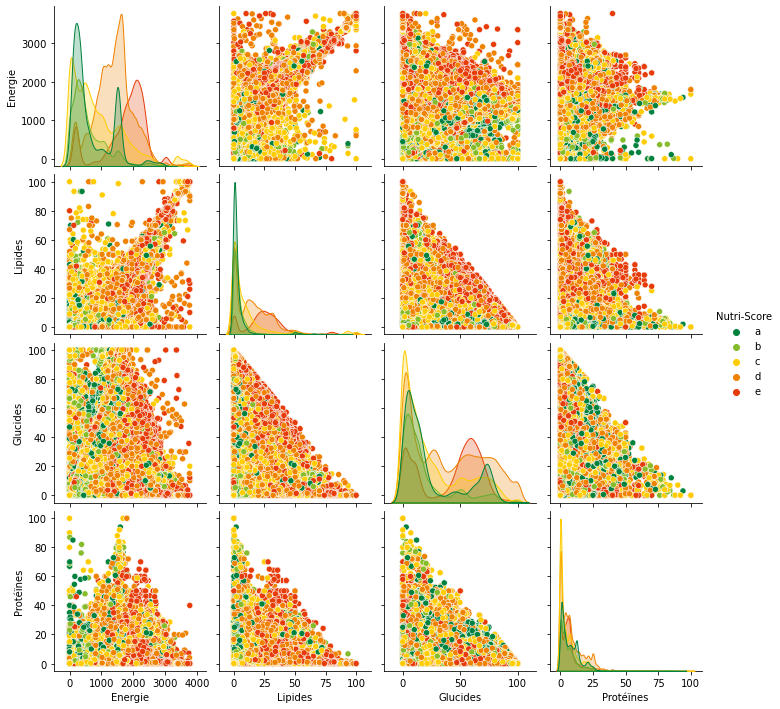

In [21]:
sns.pairplot(data_e ,hue='Nutri-Score', palette=colors, hue_order=['a','b','c','d','e'])
plt.savefig("./Visualisations/Nuages de points - Variables energie", bbox_inches='tight')
plt.show()

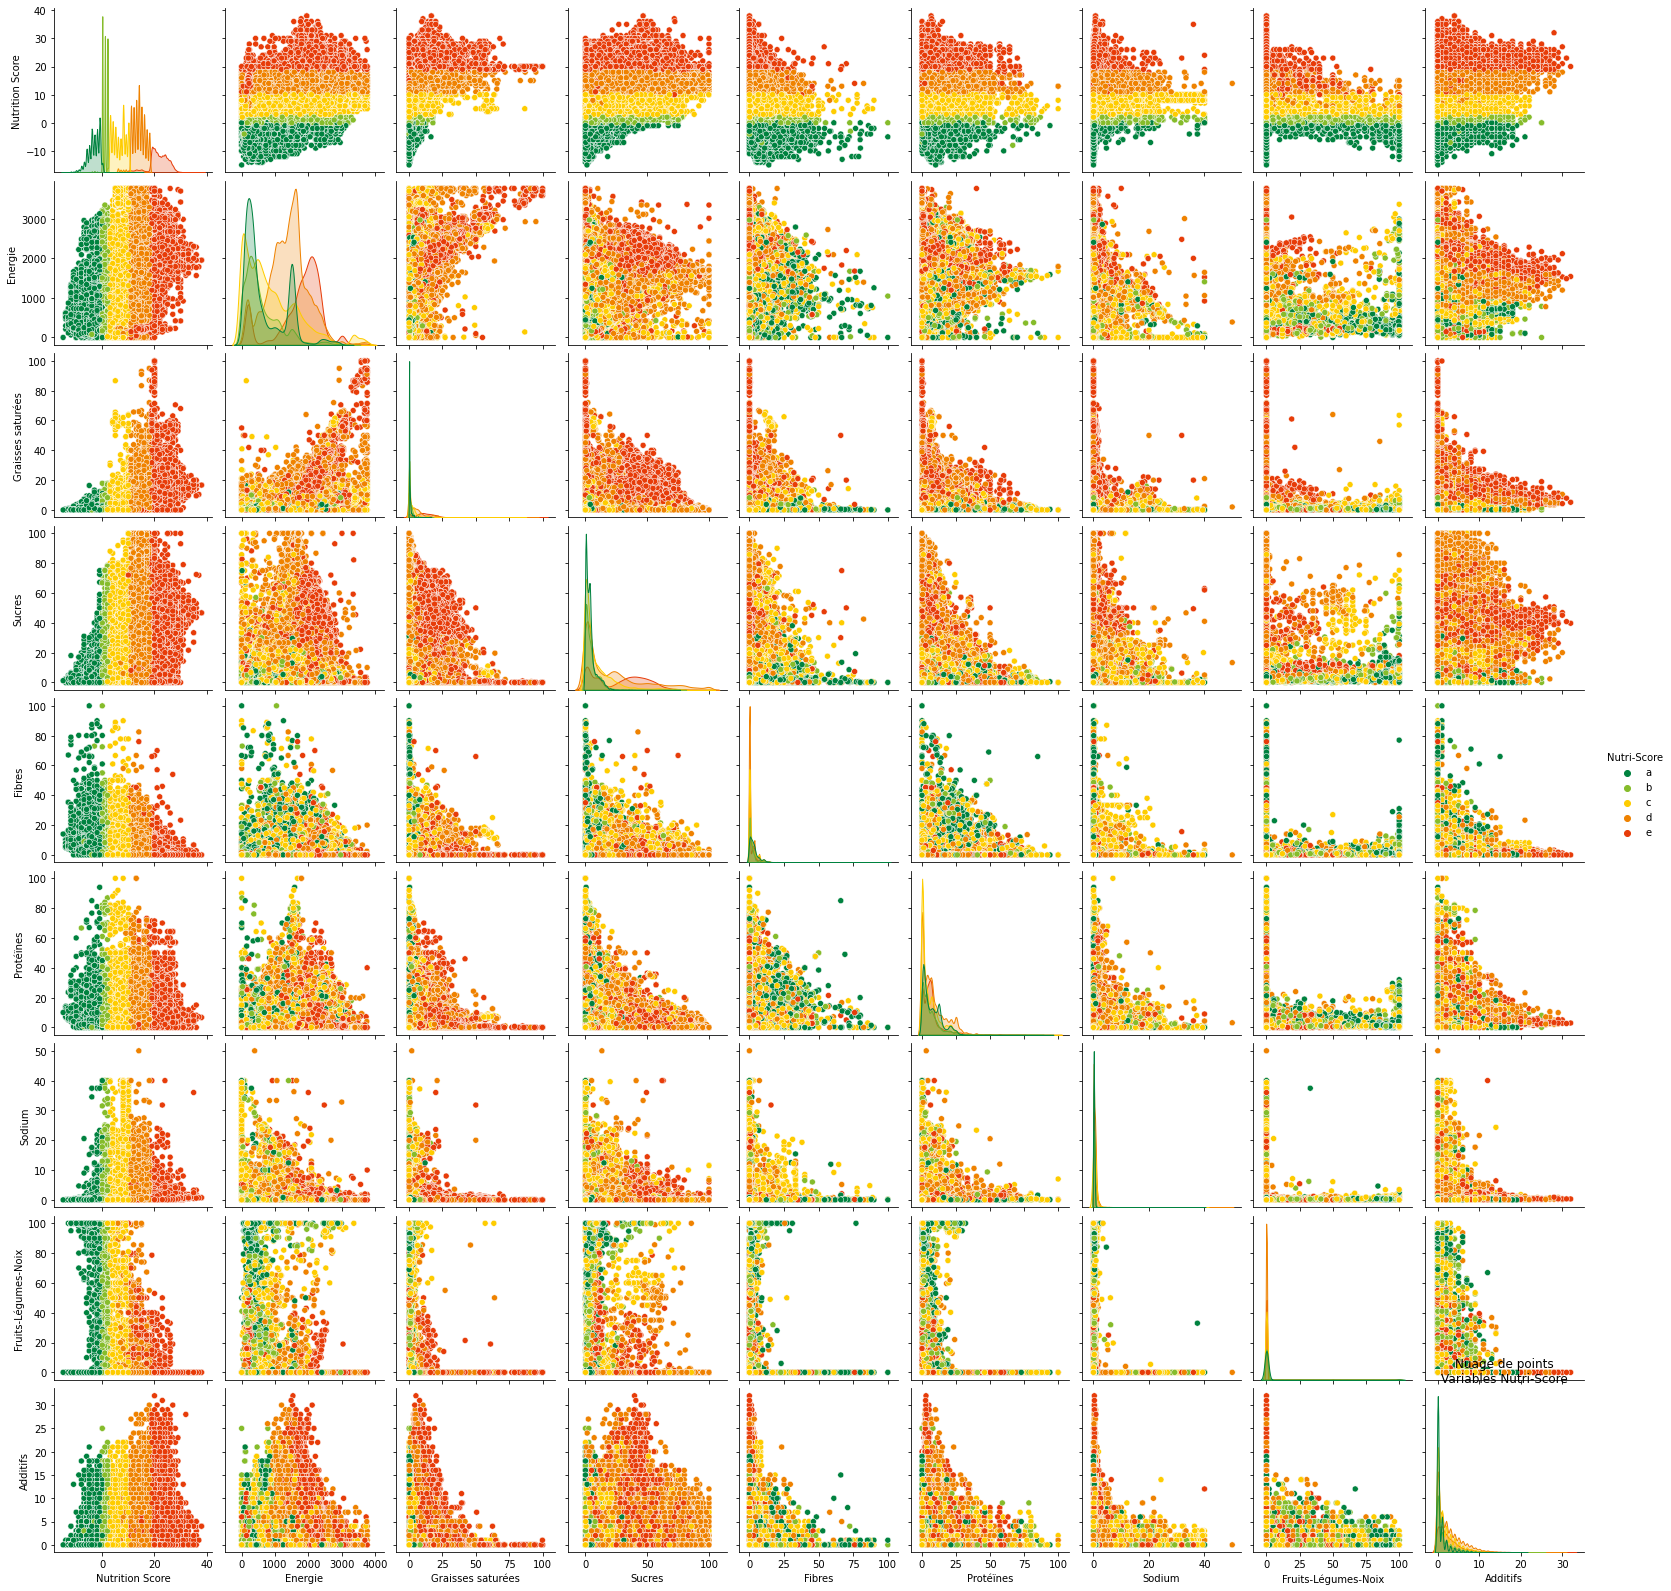

In [22]:
sns.pairplot(data_s ,hue='Nutri-Score', palette=colors, hue_order=['a','b','c','d','e'])
plt.title("Nuage de points\nVariables Nutri-Score")
plt.savefig("./Visualisations/Nuages de points - Variables Nutri-Score", bbox_inches='tight')
plt.show()

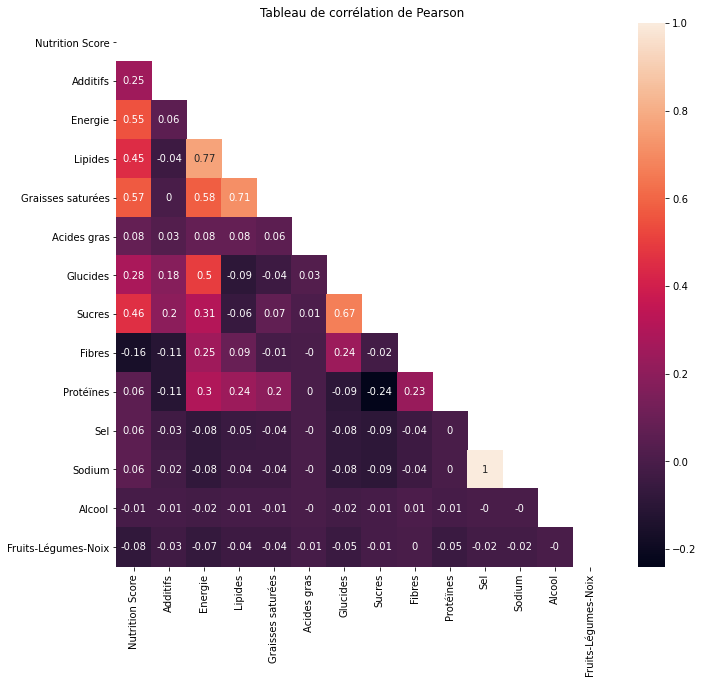

In [23]:
plt.figure(figsize = (11,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr().round(2), annot=True, mask=mask)
plt.title("Tableau de corrélation de Pearson")
plt.savefig("./Visualisations/Tableau de corrélation de Pearson", bbox_inches='tight')
plt.show()

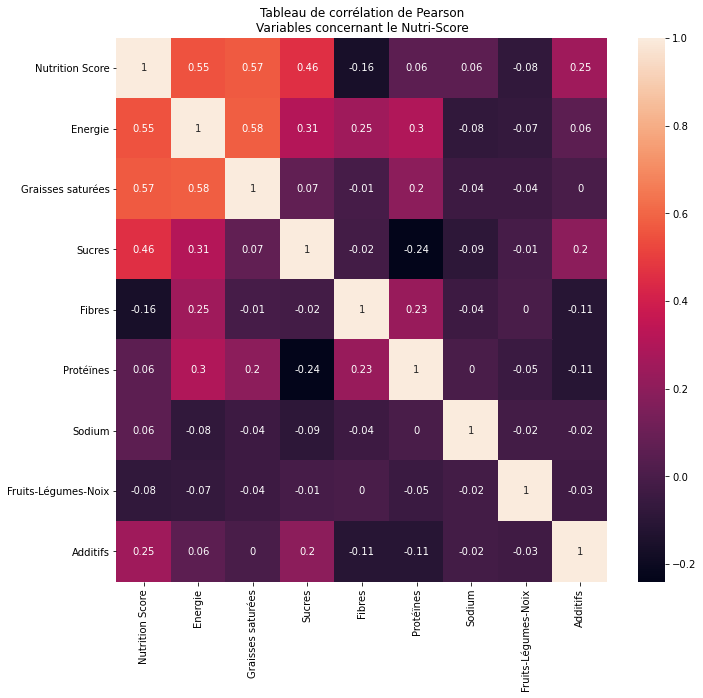

In [24]:
plt.figure(figsize = (11,10))
sns.heatmap(data_s.corr().round(2), annot=True)
plt.title("Tableau de corrélation de Pearson\nVariables concernant le Nutri-Score")
plt.savefig("./Visualisations/Tableau de corrélation de Pearson - Variables concernant le Nutri-Score", bbox_inches='tight')
plt.show()

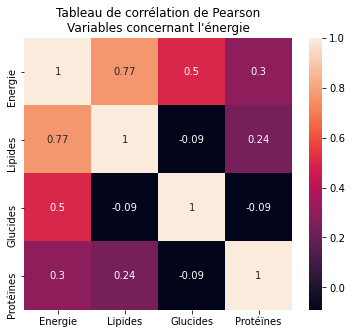

In [25]:
plt.figure(figsize = (6,5))
sns.heatmap(data_e.corr().round(2), annot=True)
plt.title("Tableau de corrélation de Pearson\nVariables concernant l'énergie")
plt.savefig("./Visualisations/Tableau de corrélation de Pearson - Variables concernant l'énergie", bbox_inches='tight')
plt.show()

### ANOVA

In [26]:
X = data["Energie"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df             F  PR(>F)     EtaSq
Y         3.701732e+10       4.0  20007.112385     0.0  0.262143
Residual  1.041931e+11  225257.0           NaN     NaN       NaN

In [27]:
X = data["Nutrition Score"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df             F  PR(>F)     EtaSq
Y         1.552390e+07       4.0  606012.68153     0.0  0.914975
Residual  1.442572e+06  225257.0           NaN     NaN       NaN

In [28]:
X = data["Graisses saturées"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df             F  PR(>F)     EtaSq
Y         3.810806e+06       4.0  25140.465883     0.0  0.308643
Residual  8.536145e+06  225257.0           NaN     NaN       NaN

In [29]:
X = data["Sucres"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df             F  PR(>F)     EtaSq
Y         1.890801e+07       4.0  14169.779211     0.0  0.201035
Residual  7.514516e+07  225257.0           NaN     NaN       NaN

In [30]:
X = data["Fibres"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df            F  PR(>F)     EtaSq
Y         1.483543e+05       4.0  2299.687432     0.0  0.039234
Residual  3.632869e+06  225257.0          NaN     NaN       NaN

In [31]:
X = data["Protéïnes"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df          F  PR(>F)     EtaSq
Y         2.333129e+05       4.0  926.02072     0.0  0.016178
Residual  1.418850e+07  225257.0        NaN     NaN       NaN

In [32]:
X = data["Sodium"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df           F  PR(>F)     EtaSq
Y         2.329958e+04       4.0  998.105089     0.0  0.017415
Residual  1.314589e+06  225257.0         NaN     NaN       NaN

In [33]:
X = data["Fruits-Légumes-Noix"]
Y = data['Nutri-Score']

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df           F         PR(>F)     EtaSq
Y         5.220383e+04       4.0  248.666725  1.520232e-213  0.004396
Residual  1.182233e+07  225257.0         NaN            NaN       NaN

In [34]:
X = data['Additifs']
Y = data["Groupe NOVA"]

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df             F  PR(>F)     EtaSq
Y         5.858000e+05       3.0  30655.754281     0.0  0.289912
Residual  1.434816e+06  225258.0           NaN     NaN       NaN

In [35]:
X = data['Energie']
Y = data["Groupe NOVA"]

mod = ols('X ~ Y',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
aov_table

sum_sq        df            F  PR(>F)     EtaSq
Y         2.024219e+09       3.0  1091.994433     0.0  0.014335
Residual  1.391862e+11  225258.0          NaN     NaN       NaN

## Khi - 2

In [36]:
X = "Nutri-Score"
Y = "Groupe NOVA"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

Groupe NOVA      1      2      3       4   Total
Nutri-Score                                     
a            12676   7057   8654   10555   38942
b             3189   4259   5763   15038   28249
c             3851   3620  16304   30507   54282
d             1208   1608  18878   46024   67718
e              645    757   6605   28064   36071
Total        21569  17301  56204  130188  225262

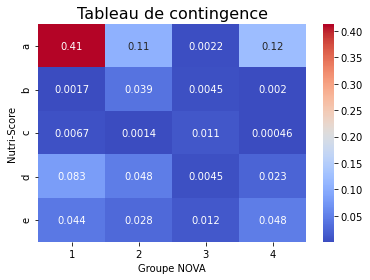

In [37]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

measure = (cont-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot=True, cmap='coolwarm')
plt.title("Tableau de contingence", fontsize=16)
plt.savefig("./Visualisations/Tableau de contingence", bbox_inches='tight')
plt.show()

In [38]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont.iloc[:-1,:-1])
df_exp= pd.DataFrame(st_exp, index= cont.iloc[:-1,:-1].index, columns=cont.iloc[:-1,:-1].columns)
print( 'Chi2:', st_chi2)
print( 'p_value:', st_p)
print( 'Degrées de liberté:', st_dof)
df_exp

Chi2: 52005.07816437903
p_value: 0.0
Degrées de liberté: 12


Groupe NOVA            1            2             3             4
Nutri-Score                                                      
a            3728.724765  2990.897453   9716.224521  22506.153262
b            2704.862254  2169.633356   7048.267333  16326.237057
c            5197.540899  4169.069270  13543.631540  31371.758290
d            6484.047651  5201.006464  16895.981000  39136.964885
e            3453.824431  2770.393457   8999.895606  20846.886505

## Analyse Multivariée

### Fonctions utilisées

In [39]:
def acp(data):
    #Affiche le graphe des éboulis de valeurs propres et les composantes et renvoie l'objet PCA
    
    #Scaler les données
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    idx = ["mean", "std"]
    df = pd.DataFrame(data_scaled).describe().round(2).loc[idx, :]
    
    #ACP
    n_components = df.shape[1]
    pca = PCA(n_components=n_components)
    pca.fit(data_scaled)
    
    #Variance captée et éboulis de valeurs propres
    scree = (pca.explained_variance_ratio_*100).round(2)
    scree_cum = scree.cumsum().round()
    x_list = range(1, n_components+1)
    list(x_list)
    plt.bar(x_list, scree)
    plt.plot(x_list, scree_cum,c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.axhline(y=80, color='g')
    plt.axhline(y=90, color='g')
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
    # Composantes
    pcs = pca.components_
    pcs = pd.DataFrame(pcs)
    pcs.columns = data.columns
    pcs.index = [f"F{i}" for i in x_list]
    pcs.T
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
    plt.savefig("./Visualisations/Heatmap {}".format('data'), bbox_inches='tight')
    plt.show()
    
    return pca, data_scaled

In [40]:
def correlation_graph(pca, 
                      x_y, 
                      features,
                     name = None) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(14, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Nom du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig("./Visualisations/Cercle des corrélations (F{} et F{} de {})".format(x+1, y+1, name), bbox_inches='tight' )
    plt.show(block=False)

In [41]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker=".",
                            name = None):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1))
    plt.savefig("./Visualisations/Projection des individus (F{} et F{} de {})".format(x+1, y+1, name ), bbox_inches='tight' )
    plt.show()



### ACP

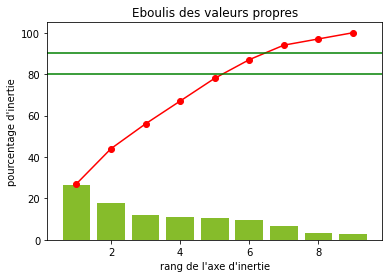

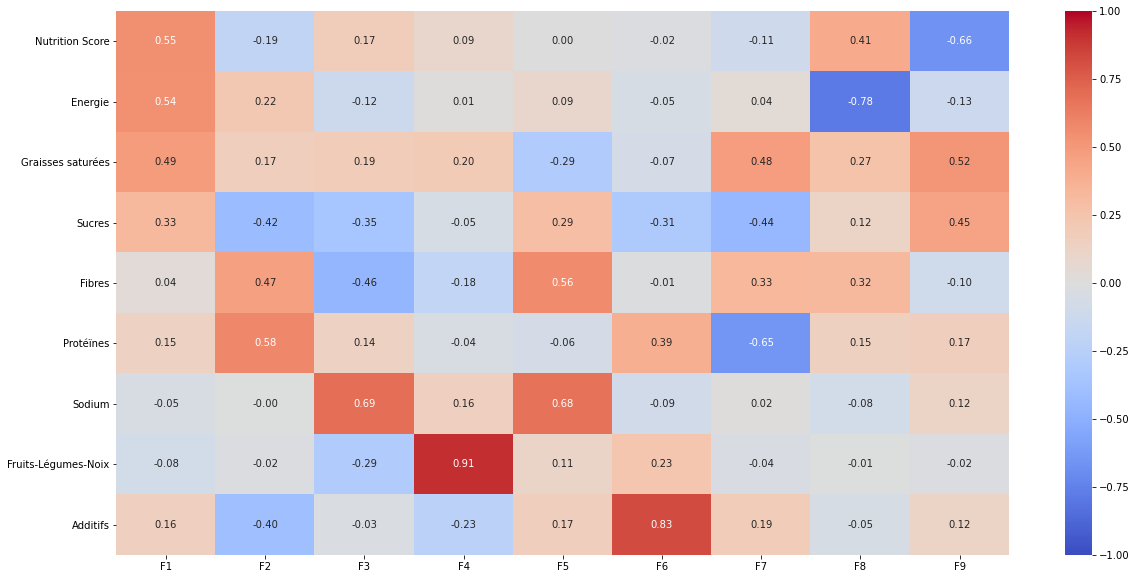

In [42]:
data_nutri = data_s.drop('Nutri-Score', axis=1)
pca_nutri , scaled_nutri = acp(data_nutri)

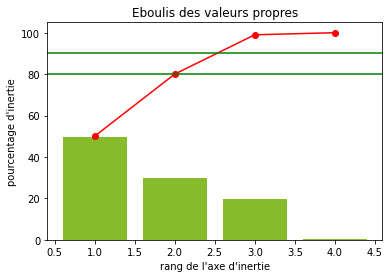

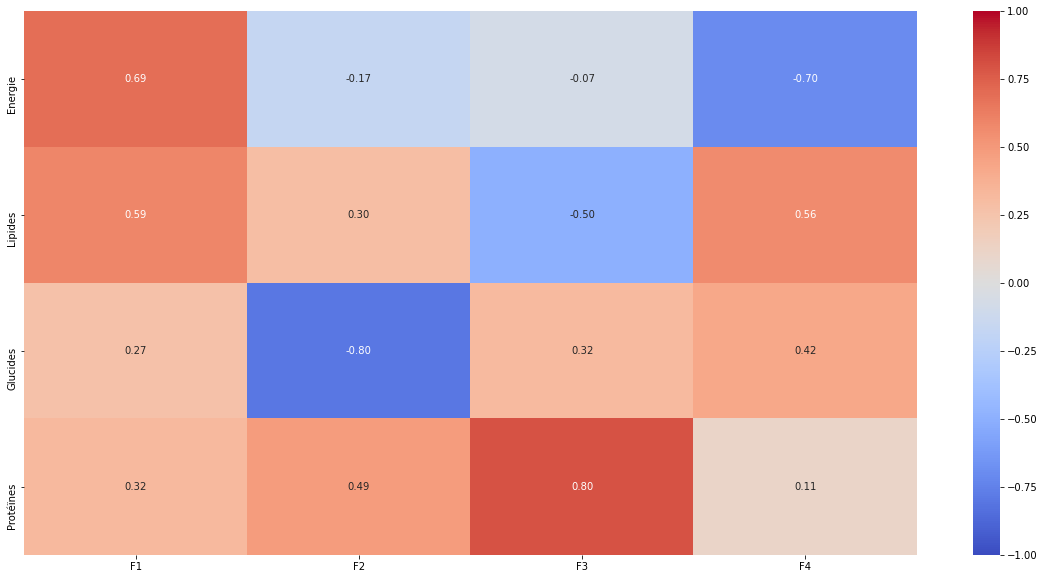

In [43]:
data_energ =data_e.drop('Nutri-Score', axis=1)
pca_energ , scaled_energ = acp(data_energ)

### Cercle de corrélations

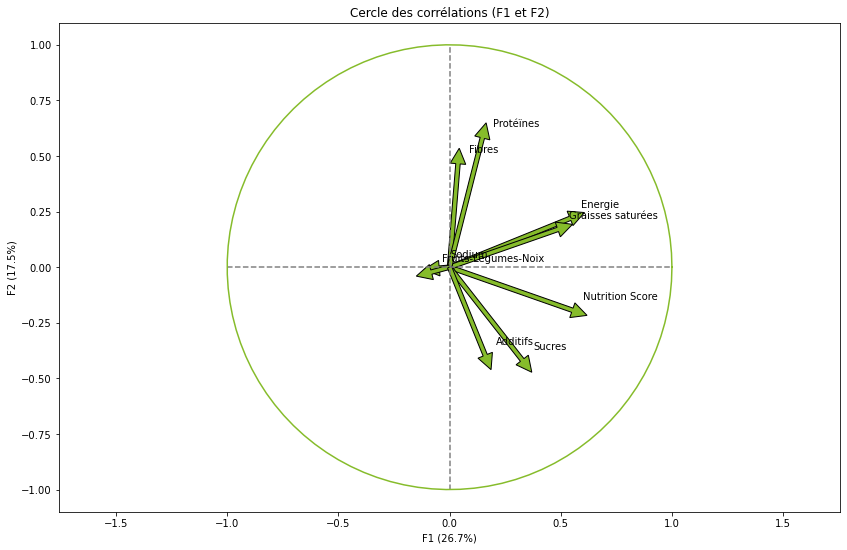

In [44]:
correlation_graph(pca_nutri,(0,1),data_nutri.columns, name= 'Nutrition')

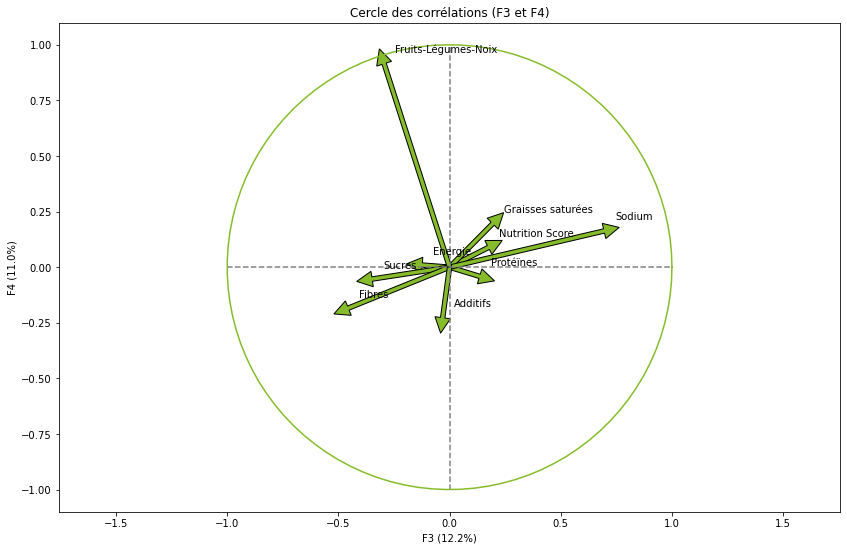

In [45]:
correlation_graph(pca_nutri,(2,3),data_nutri.columns, name= 'Nutrition')

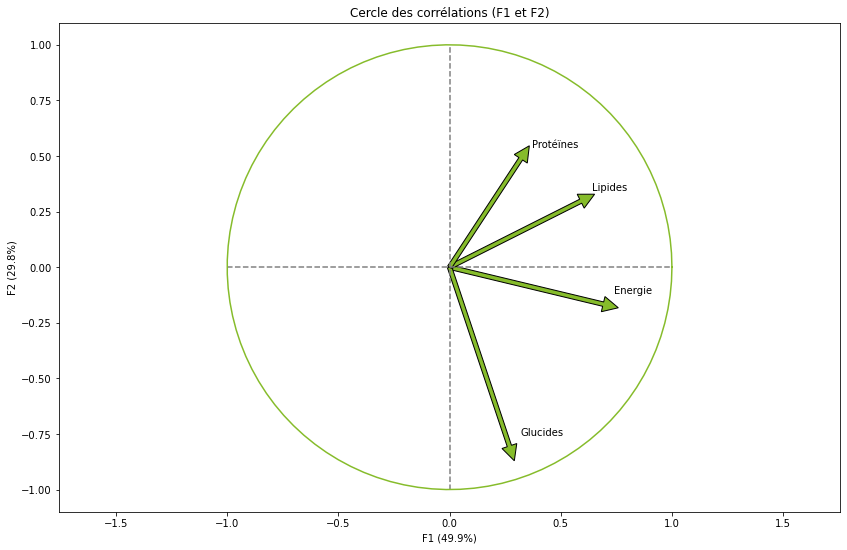

In [46]:
correlation_graph(pca_energ,(0,1),data_energ.columns, name= 'Nutrition')

### Nuages des individus

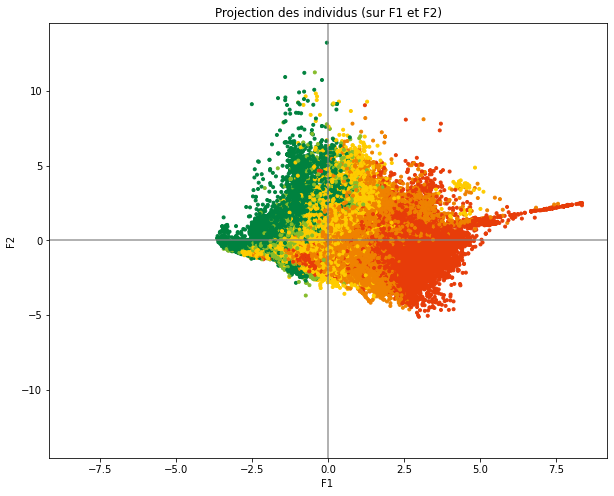

In [47]:
proj_nutri = pca_nutri.transform(scaled_nutri)
display_factorial_planes(proj_nutri, 
                                (0,1), 
                         clusters=data['Nutri-Score'].map(my_pal), name= 'Nutrition Nutri-Score')

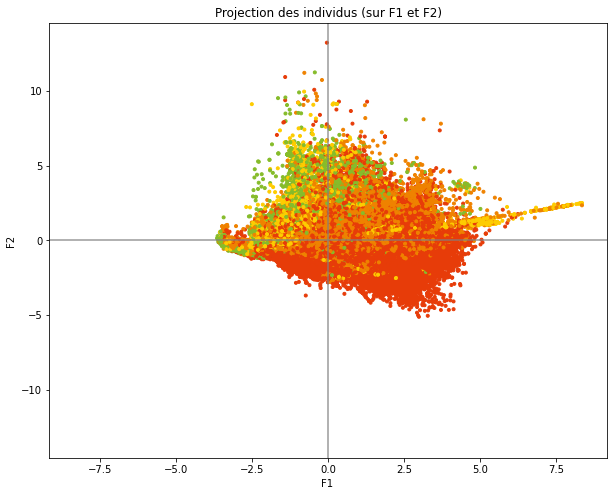

In [48]:
display_factorial_planes(proj_nutri, 
                                (0,1), 
                         clusters=data['Groupe NOVA'].map(my_pal2), name= 'Nutrition Groupe Nova')

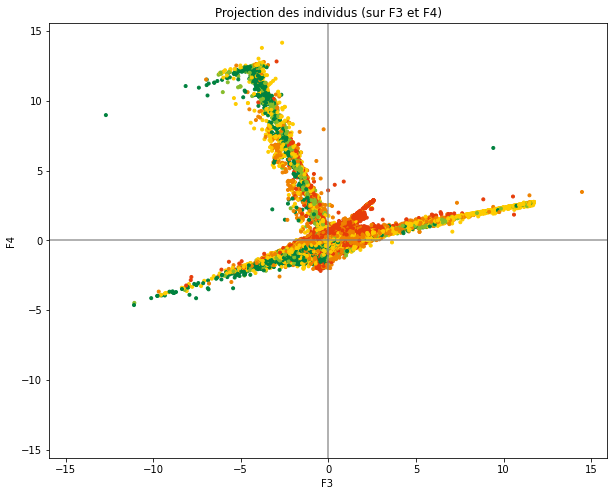

In [49]:
display_factorial_planes(proj_nutri, 
                                (2,3), 
                         clusters=data['Nutri-Score'].map(my_pal),  name= 'Nutrition Nutri-score')

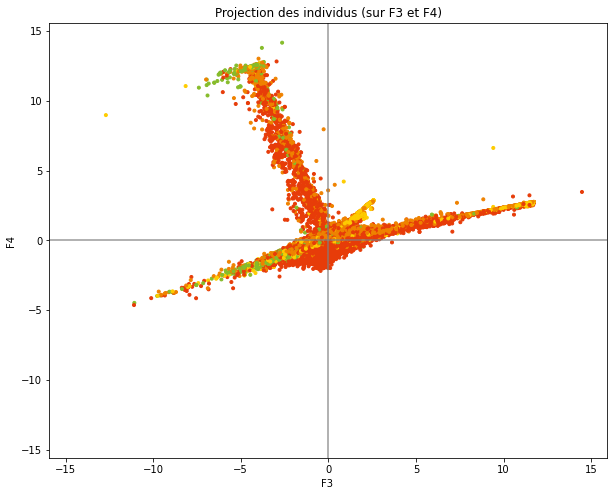

In [50]:
display_factorial_planes(proj_nutri, 
                                (2,3), 
                         clusters=data['Groupe NOVA'].map(my_pal2),  name= 'Nutrition Groupe NOVA')